In [1]:
# Now you can import the Deck class
import sys
sys.path.append('../src')

from montecarlo import MonteCarlo
from player import Player, DiscardBiggestStrategy, MinimizeCardNumberStrategy

from trueskill import Rating, rate, setup, TrueSkill

In [2]:
verbose = False
    
players = [
    # Player('Player 1', DiscardBiggestStrategy(dhumbal_threshold=5, draw_graveyard_threshold=5), verbose=verbose), 
    # Player('Player 2', DiscardBiggestStrategy(dhumbal_threshold=5, draw_graveyard_threshold=5), verbose=verbose),
    Player('Player 1', MinimizeCardNumberStrategy(dhumbal_threshold=5, draw_graveyard_threshold=8, try_to_pool_threshold=8), verbose=verbose),
    Player('Player 2', MinimizeCardNumberStrategy(dhumbal_threshold=2, draw_graveyard_threshold=5, try_to_pool_threshold=3), verbose=verbose), 
    Player('Player 3', MinimizeCardNumberStrategy(dhumbal_threshold=5, draw_graveyard_threshold=5, try_to_pool_threshold=3), verbose=verbose),
    Player('Player 4', MinimizeCardNumberStrategy(dhumbal_threshold=5, draw_graveyard_threshold=5, try_to_pool_threshold=3), verbose=verbose),
    Player('Player 5', MinimizeCardNumberStrategy(dhumbal_threshold=4, draw_graveyard_threshold=4, try_to_pool_threshold=2), verbose=verbose),
    ]

In [4]:
mc = MonteCarlo(players, 10000, verbose=verbose)
mc.run_simulation()
print([len(x) for x in mc.results])
analysis = mc.analyze_results()
print(analysis)

[12, 13, 11, 9, 11, 12, 11, 11, 13, 11, 12, 13, 12, 12, 12, 12, 11, 10, 11, 11, 13, 12, 11, 9, 12, 9, 15, 11, 14, 11, 12, 11, 13, 13, 12, 11, 11, 11, 12, 13, 12, 11, 13, 14, 14, 11, 13, 14, 12, 14, 10, 10, 11, 13, 12, 11, 11, 13, 12, 14, 11, 13, 12, 10, 12, 12, 11, 12, 13, 12, 10, 11, 11, 10, 10, 13, 11, 11, 11, 10, 11, 12, 13, 11, 11, 11, 10, 13, 11, 12, 11, 12, 12, 14, 12, 12, 13, 11, 11, 11, 12, 10, 13, 13, 14, 15, 14, 12, 12, 14, 13, 12, 13, 11, 11, 12, 11, 11, 13, 12, 13, 12, 12, 15, 11, 12, 11, 11, 12, 13, 10, 11, 12, 13, 12, 13, 13, 11, 11, 15, 12, 11, 14, 10, 13, 11, 11, 11, 13, 12, 12, 11, 12, 11, 15, 12, 13, 10, 11, 11, 9, 11, 12, 14, 11, 13, 12, 10, 12, 12, 10, 12, 13, 12, 12, 12, 12, 12, 11, 12, 10, 11, 13, 12, 12, 12, 10, 10, 11, 12, 9, 12, 12, 12, 11, 12, 11, 13, 15, 12, 11, 10, 12, 12, 12, 11, 13, 10, 11, 13, 12, 15, 10, 12, 10, 12, 11, 14, 11, 11, 8, 10, 11, 12, 11, 13, 14, 12, 11, 13, 11, 10, 13, 13, 11, 12, 14, 12, 12, 11, 12, 10, 15, 12, 11, 14, 11, 11, 13, 12, 15, 1

In [20]:
analysis["Player 1"]

{3: 5.59, 2: 17.84, 1: 14.219999999999999, 4: 1.48, 5: 0.22999999999999998}

In [5]:
from collections import Counter
import numpy as np

# Assuming mc.results is a list of lists of dictionaries
mc_results = mc.results  # Replace this with your actual Monte Carlo results variable

# Function to analyze data for a specific player (defined earlier)
# def analyze_player_data(player_name, data):
#     ...

# Analyze data for each player across all games
player_stats = {}
player_statistics = {}
for game_list in mc_results:
    # Temporary structure to store data for position calculation
    temp_positions = {}
    for game in game_list:
        for player, player_data in game.items():
            player_name = player.name  # Assuming each player key has a 'name' attribute
            if player_name not in player_stats:
                player_stats[player_name] = {'scores': [], 'outcomes': [], 'rounds_played': 0, 'final_points': [], 'last_round_points': []}
            player_stats[player_name]['scores'].append(player_data[0])
            player_stats[player_name]['outcomes'].append(player_data[2])
            # Update rounds played, final points, and last round points
            player_stats[player_name]['rounds_played'] += 1
            player_stats[player_name]['final_points'].append(player_data[1])
            player_stats[player_name]['last_round_points'].append(player_data[0])
            # Store in temp structure for position calculation
            temp_positions[player_name] = player_stats[player_name]

    # Calculate positions
    sorted_positions = sorted(temp_positions.items(), key=lambda x: (x[1]['rounds_played'], -x[1]['final_points'][-1], x[1]['last_round_points'][-1]), reverse=True)
    for position, (player_name, _) in enumerate(sorted_positions, start=1):
        if 'positions' not in player_stats[player_name]:
            player_stats[player_name]['positions'] = []
        player_stats[player_name]['positions'].append(position)
        
        player_stats[player_name]['rounds_played'] = 0
        player_stats[player_name]['final_points'].clear()
        player_stats[player_name]['last_round_points'].clear()


# Compute statistics for each player
for player_name, data in player_stats.items():
    mean_score = np.mean(data['scores'])
    std_deviation = np.std(data['scores'])
    variance = np.var(data['scores'])
    outcome_frequency = Counter(data['outcomes'])
    total_games = len(data['scores'])
    outcome_percentages = {outcome: (count / total_games) * 100 for outcome, count in outcome_frequency.items()}
    player_statistics[player_name] = {'mean_score': mean_score, 'std_deviation': std_deviation, 
                            'variance': variance, 'outcome_percentages': outcome_percentages}



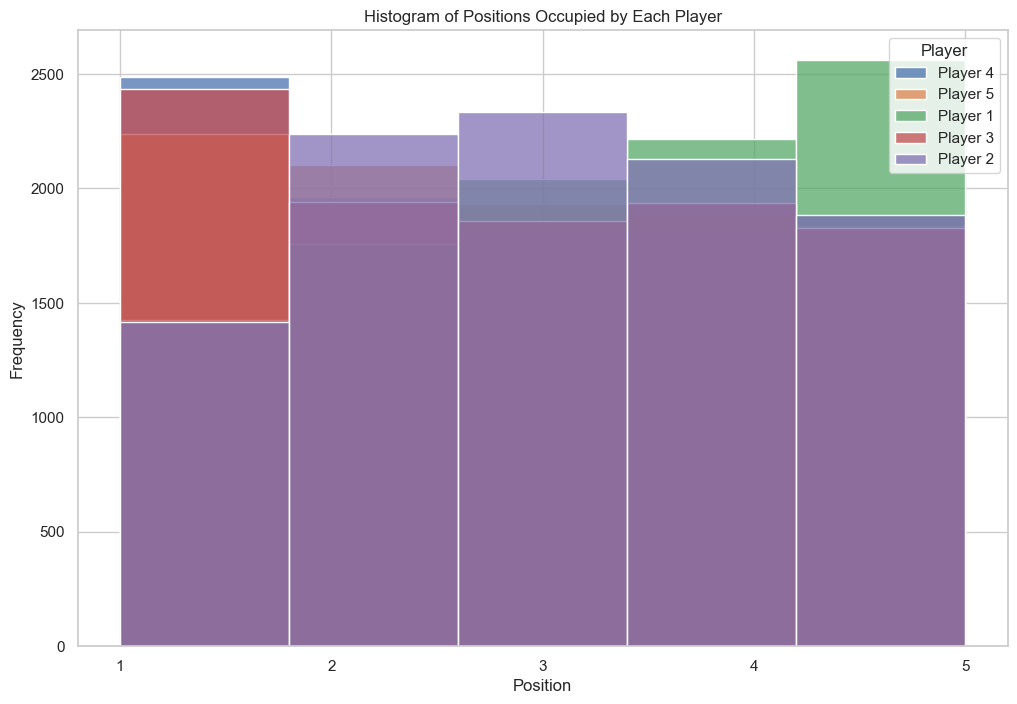

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming player_stats is defined as previously
# player_stats = ...

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot the histogram for each player's positions
for player_name, stats in player_stats.items():
    sns.histplot(stats['positions'], label=player_name, bins=len(set(stats['positions'])), kde=False, stat="count")

plt.title('Histogram of Positions Occupied by Each Player')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.legend(title='Player')
plt.xticks(range(1, len(player_stats) + 1))  # Assuming the number of positions is equal to the number of players
plt.show()


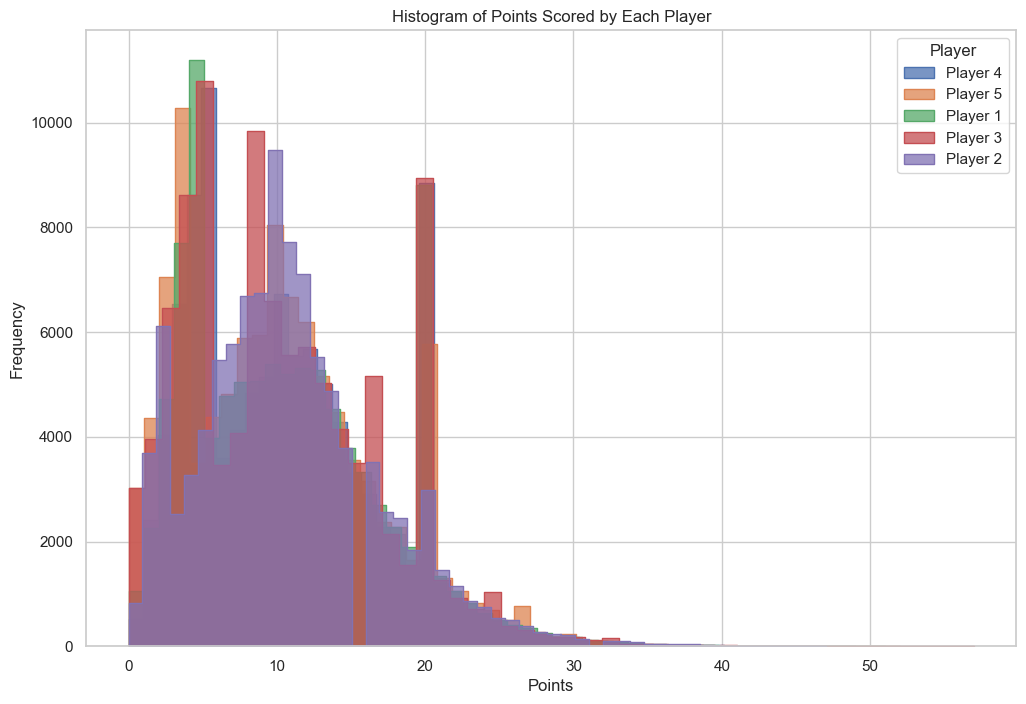

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming player_stats is defined as previously
# player_stats = ...

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot the histogram for each player's scores
for player, stats in player_stats.items():
    sns.histplot(stats['scores'], kde=False, label=player, bins=50, element='step')

plt.title('Histogram of Points Scored by Each Player')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(title='Player')
plt.show()


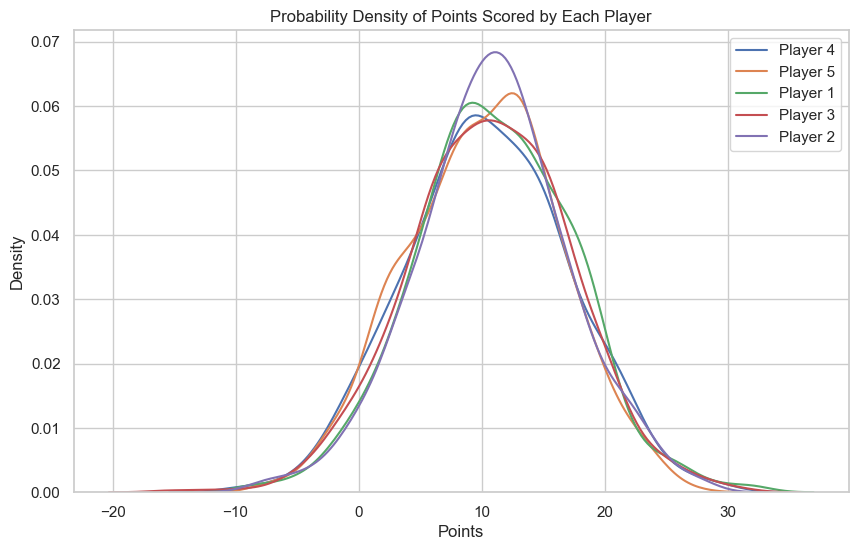

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming player_stats is defined as previously
# player_stats = ...

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the KDE for each player
for player, stats in player_statistics.items():
    sns.kdeplot(data=np.random.normal(stats['mean_score'], stats['std_deviation'], 1000), label=player)

plt.title('Probability Density of Points Scored by Each Player')
plt.xlabel('Points')
plt.ylabel('Density')
plt.legend()
plt.show()


In [15]:
# Initialize TrueSkill environment
setup(mu=1000, sigma=100, beta=4000, tau=1, draw_probability=0)

ranking_progression = {player.name: [] for player in players}  # Stores the rating progression of each player

# Initialize player ratings
for player in players:
    player_stats[player.name]["trueskill_rating"] = Rating()

# Simulate a few games and update ratings
for i in range(10000):
    # Create game results based on player positions
    game_results = [(player.name, player_stats[player.name]['positions'][i]) for player in players]
    sorted_results = sorted(game_results, key=lambda x: x[1])

    # Extract ratings for the rate function
    rated_players = [(player_stats[name]['trueskill_rating'],) for name, _ in sorted_results]

    # Update ratings
    new_ratings = rate(rated_players, ranks=[rank for _, rank in sorted_results])

    # Unpack new ratings and update player_stats
    for ((name, _), (new_rating,)) in zip(sorted_results, new_ratings):
        player_stats[name]['trueskill_rating'] = new_rating
        ranking_progression[name].append((new_rating.mu, new_rating.sigma))

# Checking the updated rating
for player in players:
    print(player.name, player_stats[player.name]["trueskill_rating"])

Player 5 trueskill.Rating(mu=1263.267, sigma=71.186)
Player 3 trueskill.Rating(mu=1368.921, sigma=71.322)
Player 2 trueskill.Rating(mu=795.535, sigma=70.893)
Player 1 trueskill.Rating(mu=229.147, sigma=71.235)
Player 4 trueskill.Rating(mu=1346.180, sigma=71.316)


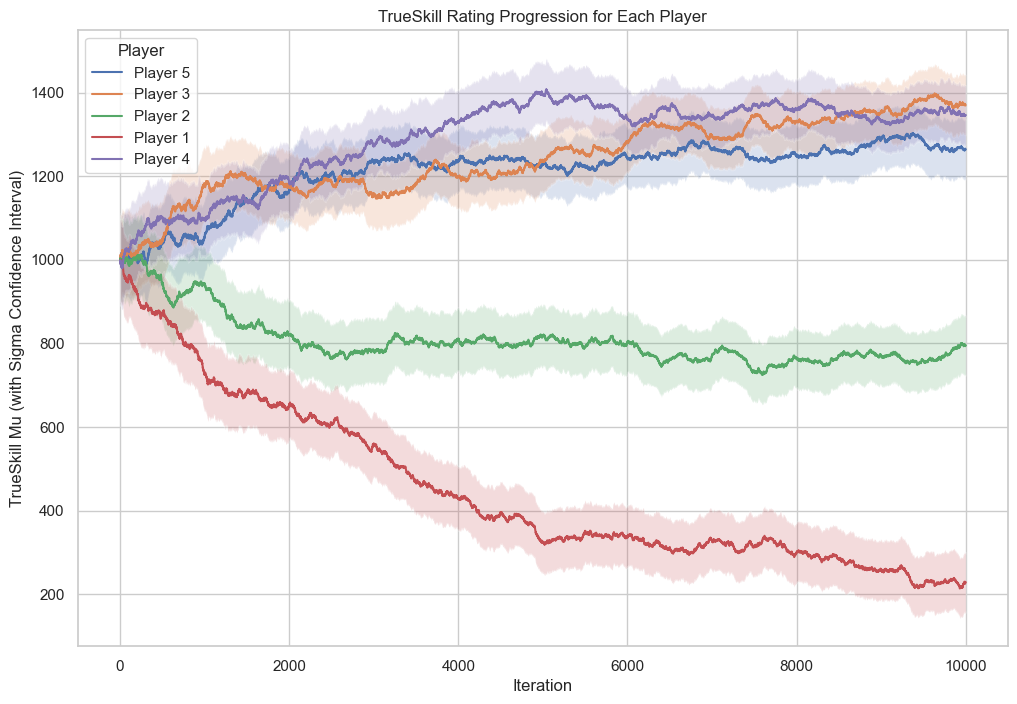

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming ranking_progression is already filled with TrueSkill data
# ranking_progression = ...

# Preparing DataFrame for Seaborn
data_for_plot = []
for name, ratings in ranking_progression.items():
    for iteration, (mu, sigma) in enumerate(ratings):
        data_for_plot.append({'Player': name, 'Iteration': iteration, 'Mu': mu, 'Sigma': sigma})

df = pd.DataFrame(data_for_plot)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Line plot for the mean (mu)
sns.lineplot(x='Iteration', y='Mu', hue='Player', data=df, legend='full')

# Adding a shaded area for the confidence interval (sigma)
for name in ranking_progression.keys():
    player_df = df[df['Player'] == name]
    plt.fill_between(player_df['Iteration'], player_df['Mu'] - player_df['Sigma'], player_df['Mu'] + player_df['Sigma'], alpha=0.2)

plt.title('TrueSkill Rating Progression for Each Player')
plt.xlabel('Iteration')
plt.ylabel('TrueSkill Mu (with Sigma Confidence Interval)')
plt.legend(title='Player')
plt.show()


In [13]:
import itertools
import math

BETA = 4000

def win_probability(team1, team2):
    delta_mu = sum(r.mu for r in team1) - sum(r.mu for r in team2)
    sum_sigma = sum(r.sigma ** 2 for r in itertools.chain(team1, team2))
    size = len(team1) + len(team2)
    denom = math.sqrt(size * (BETA * BETA) + sum_sigma)
    return TrueSkill().cdf(delta_mu / denom)

In [19]:
win_probability([player_stats['Player 1']['trueskill_rating']], [player_stats['Player 3']['trueskill_rating']])

0.42017204352050147

In [91]:
player_stats[players[2].name]["trueskill_rating"]

trueskill.Rating(mu=1000.000, sigma=100.000)

In [70]:
trueskill_ratings['Player 1']

trueskill.Rating(mu=1000.000, sigma=400.000)

In [ ]:
import itertools
import math

def win_probability(team1, team2):
    delta_mu = sum(r.mu for r in team1) - sum(r.mu for r in team2)
    sum_sigma = sum(r.sigma ** 2 for r in itertools.chain(team1, team2))
    size = len(team1) + len(team2)
    denom = math.sqrt(size * (BETA * BETA) + sum_sigma)
    ts = trueskill.global_env()
    return ts.cdf(delta_mu / denom)

In [10]:
new_ratings = rate([rated_players], ranks=[rank for _, rank in sorted_results])
    
# Update player ratings
for (name, _), rating in zip(sorted_results, new_ratings[0]):
    player_ratings[name] = rating

Player 1 drew card SIX♦
Player 2 drew card SIX♣
Player 3 drew card SEVEN♦
Player 1 drew card SIX♥
Player 2 drew card TEN♠
Player 3 drew card JOKER
Player 1 drew card NINE♥
Player 2 drew card FIVE♣
Player 3 drew card FOUR♣
Player 1 drew card EIGHT♥
Player 2 drew card TWO♦
Player 3 drew card TEN♣
Player 1 drew card FOUR♠
Player 2 drew card JOKER
Player 3 drew card TWO♣


In [13]:
players[0].called_dhumbal = True

In [16]:
game.scoreboard.record_round(game)

In [17]:
game.scoreboard.scores

{<player.Player at 0x206b1a1b340>: 60,
 <player.Player at 0x206b1a1bc40>: 65,
 <player.Player at 0x206b1a1bbb0>: 56}

In [22]:
game.prepare_next_round(
    
)

Starting Round 2
Current Scores: {<player.Player object at 0x00000206B1A1B340>: 60, <player.Player object at 0x00000206B1A1BC40>: 65, <player.Player object at 0x00000206B1A1BBB0>: 56}


KeyboardInterrupt: Interrupted by user